<a href="https://www.kaggle.com/sonujha090/exploringpiimage?scriptVersionId=87042552" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
ls ../input/fruit-images-for-object-detection/train_zip/

train/


In [194]:
from glob import glob
from PIL import Image, ImageDraw
from PIL import PSDraw
import matplotlib.pyplot as plt
from pathlib import Path
import os
from xml.etree import ElementTree as et

%matplotlib inline

In [196]:
images = glob(f'{path}/train_zip/**/*.jpg')
images = [Path(x) for x in images]
images[:5]

[PosixPath('../input/fruit-images-for-object-detection/train_zip/train/banana_68.jpg'),
 PosixPath('../input/fruit-images-for-object-detection/train_zip/train/apple_46.jpg'),
 PosixPath('../input/fruit-images-for-object-detection/train_zip/train/orange_20.jpg'),
 PosixPath('../input/fruit-images-for-object-detection/train_zip/train/mixed_1.jpg'),
 PosixPath('../input/fruit-images-for-object-detection/train_zip/train/apple_68.jpg')]

In [197]:
def get_img_bbox(path):
    img = Image.open(path)
    
    name = path.name[:-4]+'.xml'
    annot_path = os.path.join("../input/fruit-images-for-object-detection/train_zip/train", name)    
    
    tree = et.parse(annot_path)
    root = tree.getroot()
    boxes = []
    labels = []
    # box coordinates for xml files are extracted and corrected for image size given
    for member in root.findall('object'):
        label = member.find('name').text

        # bounding box
        xmin = int(member.find('bndbox').find('xmin').text)
        xmax = int(member.find('bndbox').find('xmax').text)

        ymin = int(member.find('bndbox').find('ymin').text)
        ymax = int(member.find('bndbox').find('ymax').text)
        

        boxes.append([xmin, ymin, xmax, ymax])
        labels.append(label)
    return img, boxes, labels


In [198]:
get_img_bbox(images[0])

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1199x674 at 0x7F699F9AF290>,
 [[470, 161, 992, 495],
  [628, 1, 1169, 298],
  [1, 3, 412, 344],
  [1, 249, 260, 669],
  [229, 449, 710, 674],
  [822, 480, 1198, 674]],
 ['banana', 'banana', 'banana', 'banana', 'banana', 'banana'])

In [202]:
def draw_on_image(img_path):
    img, boxes, labels = get_img_bbox(img_path)
    draw = ImageDraw.Draw(img)

    for box, label in zip(boxes, labels):
        draw = ImageDraw.Draw(img)
        x1, y1, x2, y2 = box[0], box[1], box[2], box[3]
        draw.rectangle(xy=((x1,y1),(x2,y2)))
        draw.text((x1, y1), label, fill=(255, 0, 0)) 
    return img

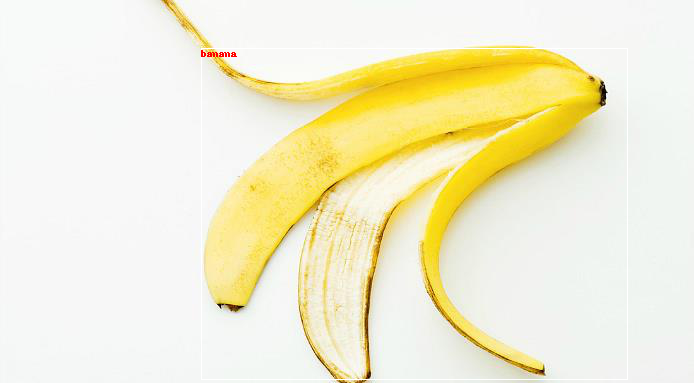

In [203]:
draw_on_image(images[5])

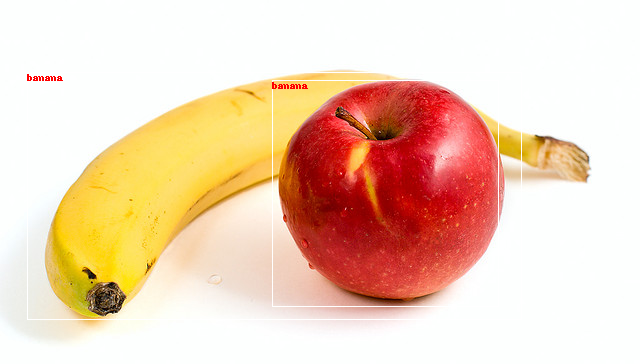

In [204]:
draw_on_image(images[200])

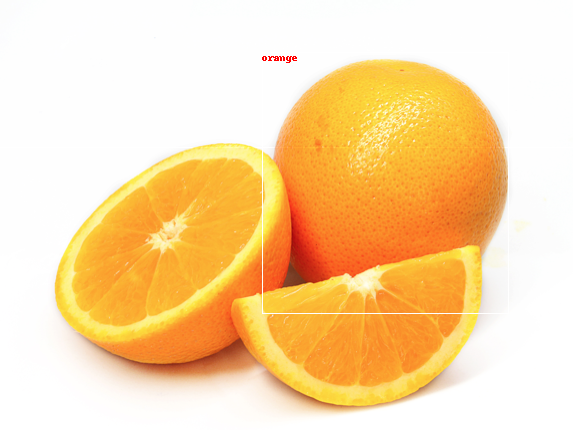

In [205]:
draw_on_image(images[220])